In [310]:
library(ggplot2)
library(gridExtra)

# Functions

In [311]:
logistic <- function(x) { 1/(1+exp(-x)) }

bundt_rng <- function(x) {
    r <- rgamma(n=1,shape=2.0)
    theta <- runif(n=1, min=-pi, max=pi)
    c(r*cos(theta), r*sin(theta))
}

wcauchy_rng <- function(mu, gamma) {
    x <- rcauchy(n=1, location=mu, scale=gamma)
    return(atan2(sin(x), x=cos(x)))
}

# Model 1
* M1 prefers a tighter scale for uniform behaviour

In [356]:
reps = 50
n    = 2000
m1_rate = 5
# Sample mean phase angle
sample_m1 <- function(){
    mu_ep <- bundt_rng(1)
    s     <- rexp(1, rate = m1_rate)
    a     <- rnorm(1, sd=s)
    a_e   <- rnorm(1, sd=s)
    a_c   <- rnorm(1, sd=s)
    a_p   <- rnorm(1, sd=s)
    r   <- logistic(a + a_e + a_p + a_c)
    gam <- -log(r) 
    y   <- sapply(c(1:n), FUN=function(x) wcauchy_rng(mu_ep, gam))
    return(y)
}

y <- sapply(c(1:reps), FUN=function(x) sample_m1())
dat <- data.frame(x=c(y), lines=as.character(rep(c(1:reps), each=n)))

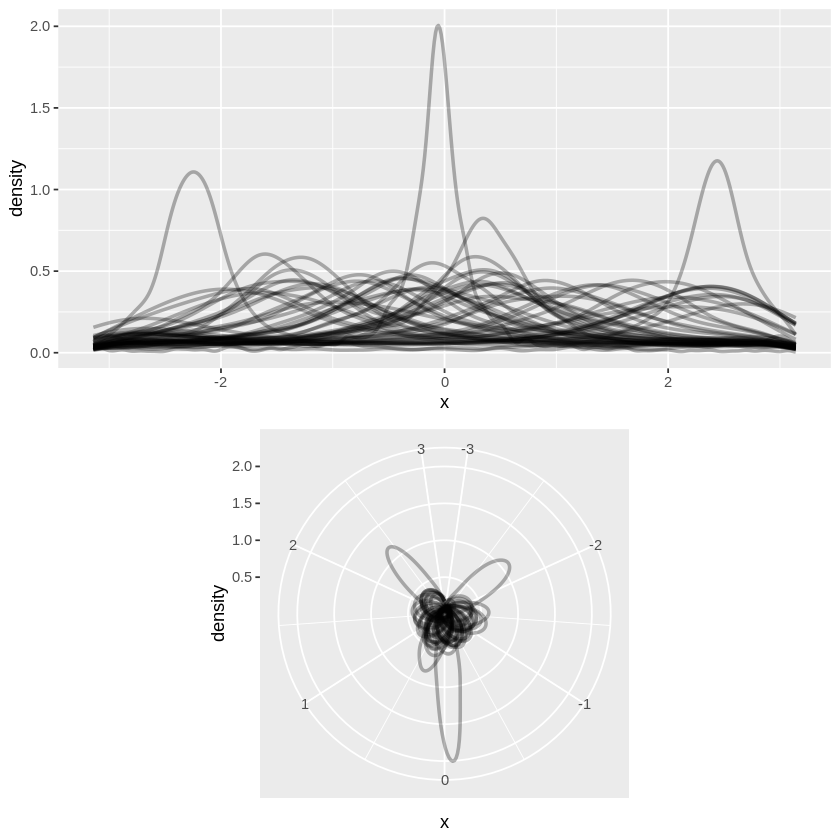

In [357]:
plot_line <- ggplot(data = dat, aes(x=x)) + geom_line(aes(group=lines), stat="density", size=1, alpha=0.3)
plot_polar <- plot_line + coord_polar()

grid.arrange(plot_line, plot_polar)

# Model 2
* M2 prefers a lighter scale for uniform behaviour

In [336]:
m2_rate=0.5
# Sample mean phase angle
sample_m2 <- function(){
    mu_ep <- bundt_rng(1)
    a     <- rexp(1, rate=m2_rate)
    a_e   <- rexp(1, rate=m2_rate)
    a_c   <- rexp(1, rate=m2_rate)
    a_p   <- rexp(1, rate=m2_rate)
    gam <- a + a_e + a_p + a_c
    y   <- sapply(c(1:n), FUN=function(x) wcauchy_rng(mu_ep, gam))
    return(y)
}

y <- sapply(c(1:reps), FUN=function(x) sample_m2())
dat <- data.frame(x=c(y), lines=as.character(rep(c(1:reps), each=n)))

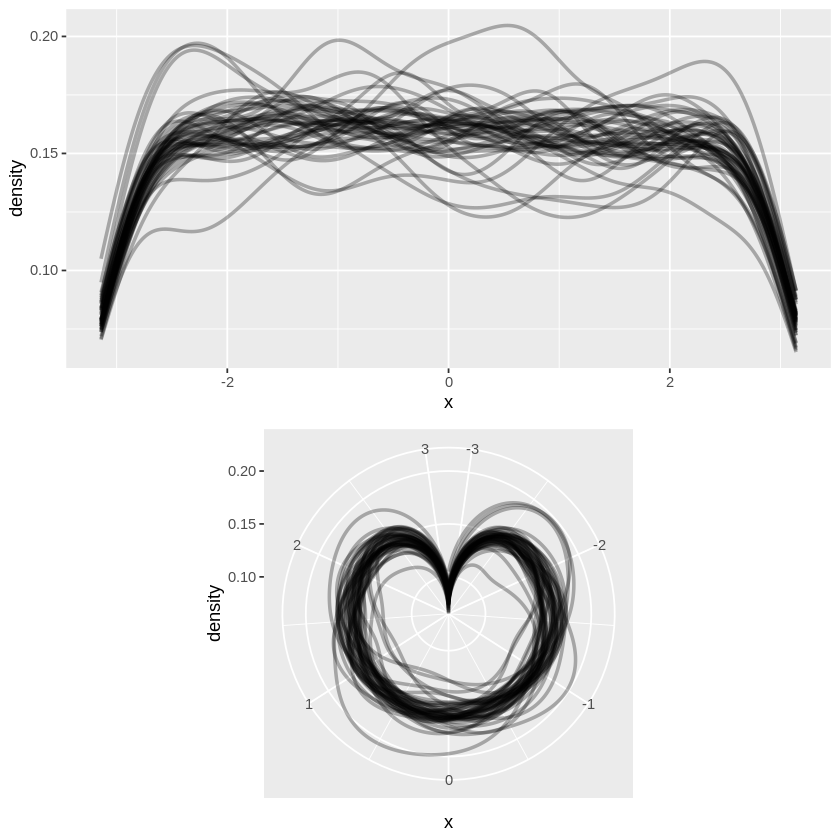

In [337]:
plot_line <- ggplot(data = dat, aes(x=x)) + geom_line(aes(group=lines), stat="density", size=1, alpha=0.3)
plot_polar <- plot_line + coord_polar()

grid.arrange(plot_line, plot_polar)

# Model 3

In [340]:
m3_rate=0.2
sample_m3 <- function(){
    mu_ep <- bundt_rng(1)
    a     <- rexp(1, rate=m3_rate)
    a_c   <- rexp(1, rate=m3_rate)
    a_ep  <- norm(mu_ep, type="2")
    gam <- a + a_ep  + a_c
    y   <- sapply(c(1:n), FUN=function(x) wcauchy_rng(mu_ep, gam))
    return(y)
}

y <- sapply(c(1:reps), FUN=function(x) sample_m3())
dat <- data.frame(x=c(y), lines=as.character(rep(c(1:reps), each=n)))

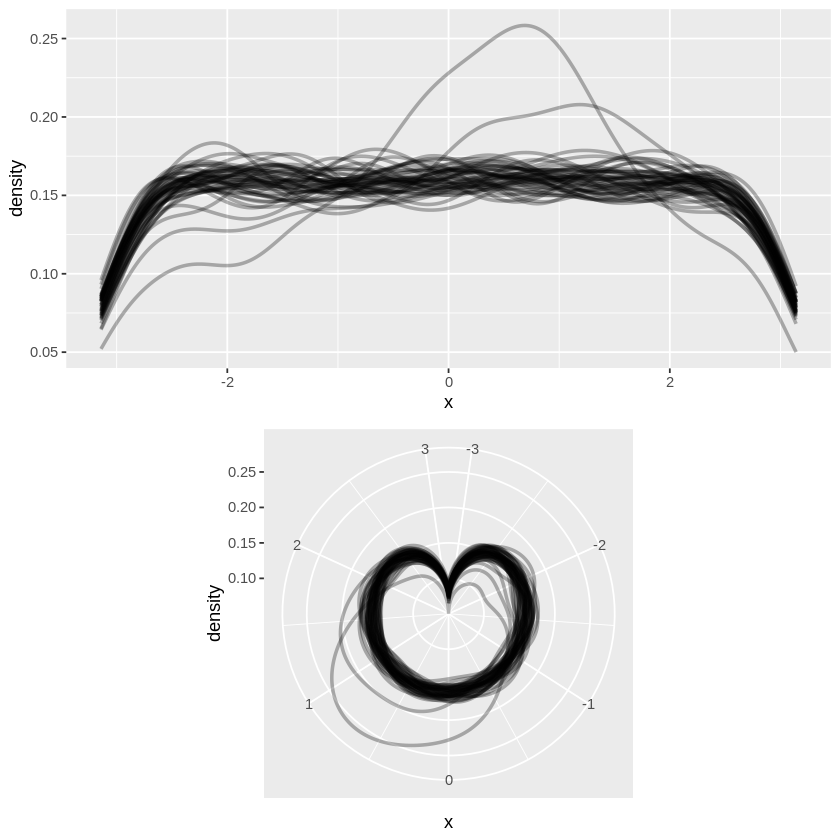

In [341]:
plot_line <- ggplot(data = dat, aes(x=x)) + geom_line(aes(group=lines), stat="density", size=1, alpha=0.3)
plot_polar <- plot_line + coord_polar()

grid.arrange(plot_line, plot_polar)

#  Model 4

In [352]:
# Sample mean phase angle
m4_rate=1
sample_m4 <- function(){
    mu_ep <- bundt_rng(1)
    s     <- rexp(1, rate=m4_rate)
    a     <- rnorm(1, sd=s)
    a_c   <- rnorm(1, sd=s)
    a_ep  <- norm(mu_ep, type="2")
    gam <- -log(logistic(a + a_c)) + a_ep
    y   <- sapply(c(1:n), FUN=function(x) wcauchy_rng(mu_ep, gam))
    return(y)
}

y <- sapply(c(1:reps), FUN=function(x) sample_m4())
dat <- data.frame(x=c(y), lines=as.character(rep(c(1:reps), each=n)))

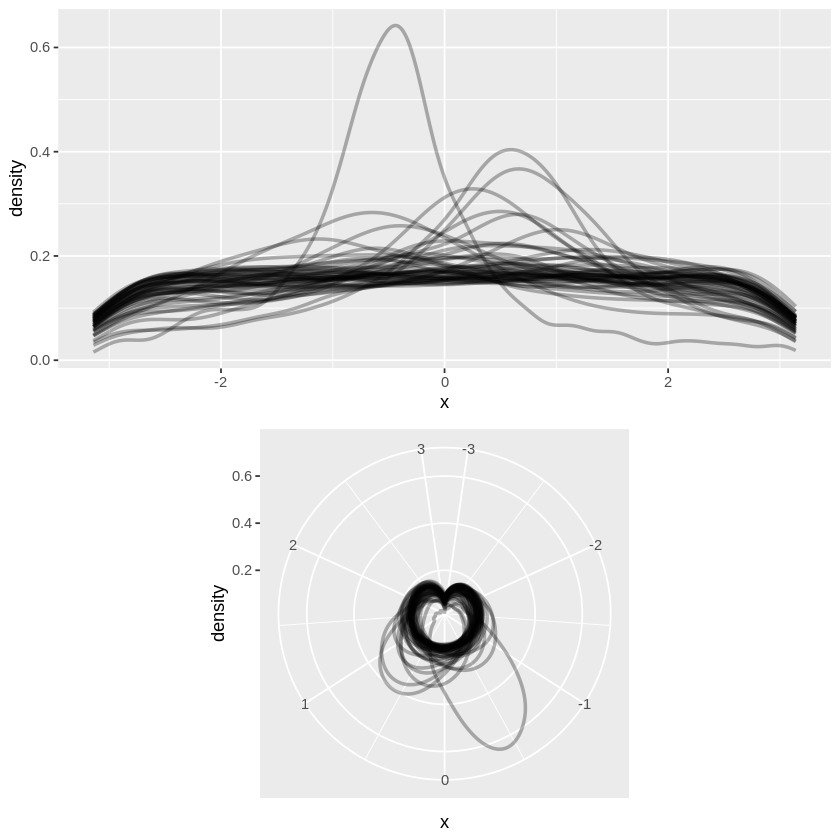

In [353]:
plot_line <- ggplot(data = dat, aes(x=x)) + geom_line(aes(group=lines), stat="density", size=1, alpha=0.3)
plot_polar <- plot_line + coord_polar()

grid.arrange(plot_line, plot_polar)

# Bundt Sampling

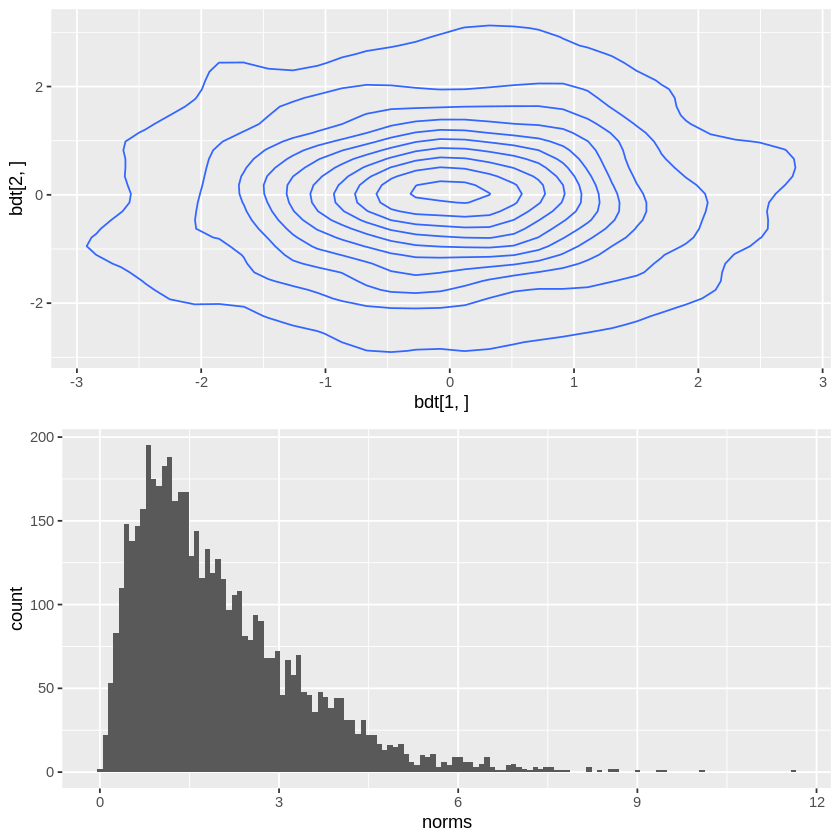

In [295]:
# Bundt rng looks fine
bdt <- sapply(c(1:5000), FUN=function(x) bundt_rng(1))
bdt_plot <- ggplot() + geom_density_2d(aes(x=bdt[1,], y=bdt[2,]))

norms <- apply(bdt, FUN=function(x) norm(x, type = "2"), MARGIN=2)
norm_plot <- ggplot() + geom_histogram(aes(x=norms), binwidth=0.09)
               
grid.arrange(bdt_plot, norm_plot)

# Comments
* Exponential prior seems like it may be too light in most cases. Prior pred shows non overlapping peaked distributions, this is helped by a tighter scale resulting in more uniform behaviour.
* Model 1 can be much to certain for some draws.
* Priors over parameters in M3 that are exponential can be made much similar to the distribution of vector norms from the bundt. As there in a exponential shape.
* Models pushed through log logistic prefer tighter scale parameters, models that are not prefer lighter ones.